# jammer
## 02 Explore the Marley models
### III- The 2017 *new* models

Michael Gully-Santiago  
Monday, May 8, 2017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
from os import listdir

In [4]:
import astropy.units as u

The name **marley13** comes from the file name that Didier Saumon sent.  It has nothing to do with year, it's literally the 13th file that Didier has sent Mark Marley through the file sharing site they use.  There is no metadata describing the release, so I am considering this a temporary grid.

In [6]:
! cat ../../Starfish/libraries/raw/marley13/parameters

wavelength:  0.400000 to 50.000000um     skip=  1     resolution=      0.


In [7]:
! ls ../../Starfish/libraries/raw/marley13/ | head -n 16

parameters
sp_t1000g1000nc_m0.0
sp_t1000g100nc_m0.0
sp_t1000g1780nc_m0.0
sp_t1000g178nc_m0.0
sp_t1000g17nc_m0.0
sp_t1000g3160nc_m0.0
sp_t1000g316nc_m0.0
sp_t1000g31nc_m0.0
sp_t1000g562nc_m0.0
sp_t1000g56nc_m0.0
sp_t1100g1000nc_m0.0
sp_t1100g100nc_m0.0
sp_t1100g1780nc_m0.0
sp_t1100g178nc_m0.0
sp_t1100g17nc_m0.0


In [12]:
all_files = listdir('../../Starfish/libraries/raw/marley13/')
files = all_files[1:]

In [13]:
temps = np.array([np.float(val[val.index('t')+1:val.index('g')]) for val in files])
surfs = np.array([np.float(val[val.index('g')+1:val.index('n')]) for val in files])

In [14]:
np.unique(temps)

array([  200.,   225.,   250.,   275.,   300.,   325.,   350.,   375.,
         400.,   425.,   450.,   475.,   500.,   525.,   550.,   575.,
         600.,   650.,   700.,   750.,   800.,   850.,   900.,   950.,
        1000.,  1100.,  1200.,  1300.,  1400.,  1500.,  1600.,  1700.,
        1800.,  1900.,  2000.,  2100.,  2200.,  2300.,  2400.])

In [15]:
gravs = np.unique(surfs)

In [16]:
gravs

array([   17.,    31.,    56.,   100.,   178.,   316.,   562.,  1000.,
        1780.,  3160.])

In [17]:
np.log10((gravs*u.m/u.s**2).to(u.cm/u.s**2).value)

array([ 3.23044892,  3.49136169,  3.74818803,  4.        ,  4.25042   ,
        4.49968708,  4.74973632,  5.        ,  5.25042   ,  5.49968708])

In [18]:
surfs = surfs*100.0 # convert to cgs units

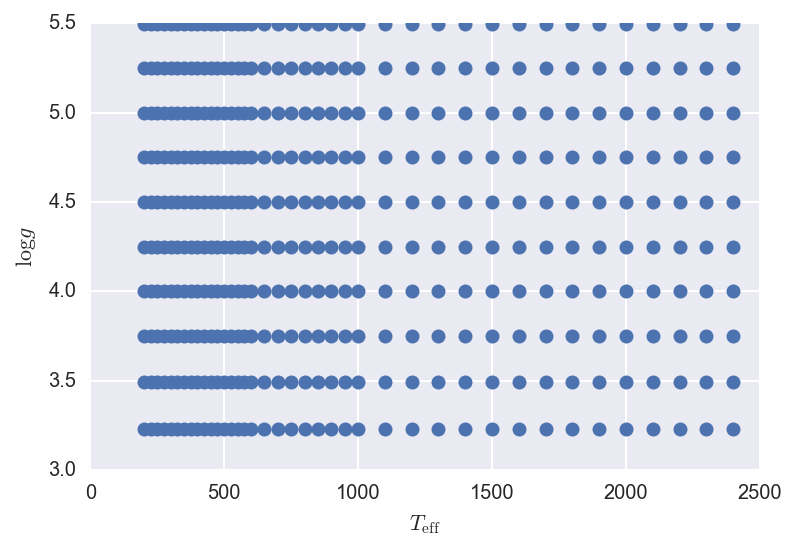

In [19]:
plt.plot(temps, np.log10(surfs), 'o')
plt.ylabel('$\log{g}$')
plt.xlabel('$T_{\mathrm{eff}}$');

OK, so the sampling is irregular.  That's totally OK.

In [30]:
! head -n4 ../../Starfish/libraries/raw/marley13/sp_t300g

  300.       56.   0.28  0.00  1.0000E+05   0.00   1.00  0.00    Teff,
    microns  Flux (erg/cm^2/s/Hz)

   50.0000000     3.61032E-09


It looks like Teff and **g** change, but all other properties are held fixed.

In [21]:
dat = pd.read_csv('../../Starfish/libraries/raw/marley13/sp_t2400g1780nc_m0.0', 
                  names=['wavelength', 'flux'],
                  skiprows=3, 
                  delim_whitespace=True)

In [22]:
dat.head()

,wavelength,flux
0,50.000000,4.471710e-08
1,49.991676,4.336250e-08
2,49.983331,4.797410e-08
3,49.975012,4.639910e-08
4,49.966672,4.614150e-08


The units are : 
- wavelength: **micron**
- flux density: **erg/cm^2/s/Hz**

There's no solid angle, so I suppose this must be at the (sub)stellar surface?  
Let's make a new column for Starfish units.

### $\frac{d f}{d\lambda} = \frac{d f}{d \nu} \cdot \frac{d \nu}{d\lambda}$

$\nu = c \lambda^{-1}$

$\frac{d \nu}{d\lambda} = (-1) c \lambda^{-2} = (-1) \nu \lambda^{-1}$

In [23]:
import astropy.constants as C
c_val = C.c.to(u.cm/u.s).value
c_val

29979245800.0

In [24]:
x = dat.wavelength.values*u.micron
x_Hz = x.to(u.Hz, equivalencies=u.spectral())
x_Ang = x.to(u.Angstrom)


y0 = dat.flux.values*u.erg/u.cm**2/u.s/u.Hz
y = y0.to(u.erg/u.cm**2/u.s/u.Angstrom, 
          equivalencies=u.spectral_density(dat.wavelength.values*u.micron))
y2 = dat.flux.values * c_val * dat.wavelength.values**-2  ##units are funky, but still works?
y3 = dat.flux.values * x_Hz.value / x_Ang.value

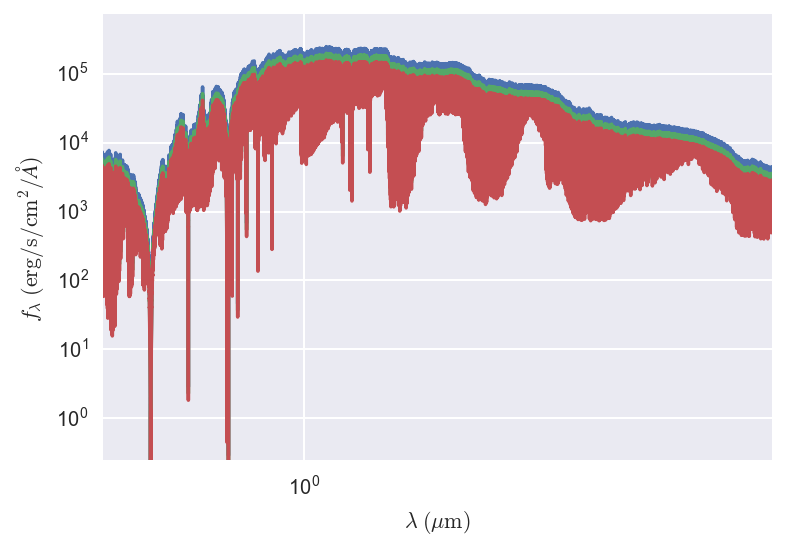

In [25]:
plt.plot(x, y)
plt.plot(x, y2*0.8)
plt.plot(x, y3*0.8**2)
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.5, 5)
plt.ylim(1.0E-6*np.nanmax(y.value), 3.0*np.nanmax(y.value))
plt.xlabel('$\lambda \;(\mu \mathrm{m})$')
plt.ylabel('$f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')

They're all dead-on, right on top of each other!

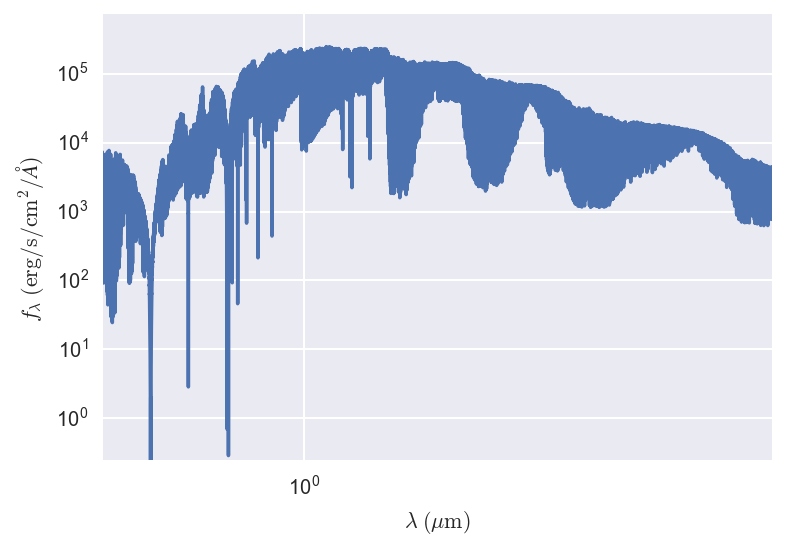

In [26]:
plt.plot(x, y)
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.5, 5)
plt.ylim(1.0E-6*np.nanmax(y.value), 3.0*np.nanmax(y.value))
plt.xlabel('$\lambda \;(\mu \mathrm{m})$')
plt.ylabel('$f_\lambda \;(\mathrm{erg/s/cm}^2/\AA)$ ')

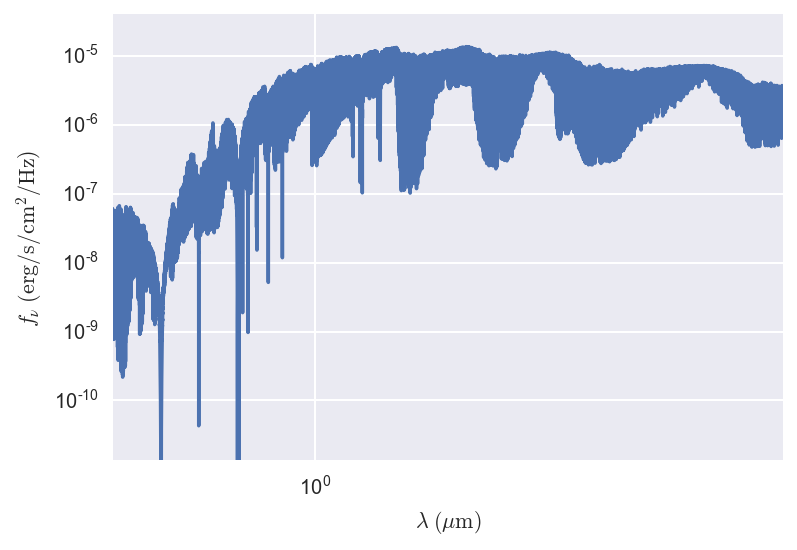

In [27]:
plt.plot(x, dat.flux)
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.5, 5)
plt.ylim(1.0E-6*np.nanmax(dat.flux.values), 3.0*np.nanmax(dat.flux.values))
plt.xlabel('$\lambda \;(\mu \mathrm{m})$')
plt.ylabel('$f_ν \;(\mathrm{erg/s/cm}^2/\mathrm{Hz})$ ')

Notice the difference between the flux densities per $\nu$ and per Angstrom.

### The end.